## Trabajo Práctico 2: Análisis con Regresión logística

**Alumnos y padron:**

Izquierdo Osorio, Stephanie. 104196 

Rosas, Martin Alejandro. 98535

---

## Preparación del entorno

In [1]:
import pandas as pd
import numpy as np

from preprocessing import *

from charts_and_write import *

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

## Carga y preparación del set de datos

In [2]:
download_raw_data()
X_data = pd.read_csv("impuestos_train.cvs")
X_holdout= pd.read_csv("impuestos_holdout.cvs")

X_data, X_holdout = prepare_existing_data(X_data, X_holdout)

## Regresión logística

La regresión logística es un método de aprendizaje supervisado sencillo el cual consiste en obtener una curva logística que sirva para predecir la clase de una instancia.

Para el procesamiento de los datos aplicamos el mismo tipo de procesamiento que en otros modelos. Este consiste en convertir las variables categóricas a numéricas mediante OneHotEncoding y normalizar los datos que correspondan para evitar que ocurra un desvío no deseado al momento de realizar los cálculos.

Buscamos los mejores hiperparámetros
En la búsqueda de los hiperparámetros consideramos que los más importantes eran los siguientes:

- **Penalidad**: Especifica la penalización del modelo. Probamos con las siguientes regularizaciones 'l1','l2,'elasticnet, y sin regularización.

- **C**: Es un parámetro que indica qué tan fuerte es la regularización. Similar a SVM.

In [15]:
penalty = ["l2","none", "l1", "elasticnet"]
c = [0.001,0.01,0.1,0.2,0.5,0.7,1.0,1.5,2,2.5,3,3.5,4,5,10]

parameters = {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 'C': c,
              'penalty': penalty}

### Primera version
A las variables categoricas les aplicamos one hot encoding

In [4]:
columns_to_encode = ["estado_marital", "categoria_de_trabajo", "rol_familiar_registrado", "religion", "trabajo", "genero", "relacion_de_dependencia"]
X_data_1 = encode_one_hot(X_data, columns_to_encode)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_data_1.drop(columns={"tiene_alto_valor_adquisitivo"}), X_data_1["tiene_alto_valor_adquisitivo"], random_state=42)

In [16]:
regression = LogisticRegression(random_state=0)
gscv_1 = GridSearchCV(regression, parameters, n_jobs = -1, scoring='roc_auc')
gs_1 = gscv_1.fit(X_train, y_train)
gs_1.best_params_

{'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}

In [17]:
regression_1 = LogisticRegression(C= 10, penalty = 'l2', solver='newton-cg',random_state=0)
regression_1.fit(X_train, y_train)
y_pred_1 = regression_1.predict(X_test)

In [8]:
show_metrics(regression_1, y_pred_1, y_test, X_test, "Regresion 1")

Accuracy: 0.8519837857757032
----------------------------------------------
Precision: 0.5973015049299429
----------------------------------------------
Recall: 0.7284810126582278
----------------------------------------------
F1_score: 0.6564014827487882
----------------------------------------------
AUC-ROC score para Regresion 1: 0.899


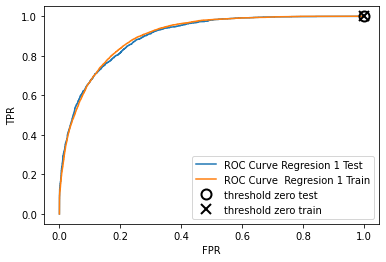

In [18]:
show_roc_curve(regression_1, "Regresion 1", X_test, X_train, y_test, y_train)

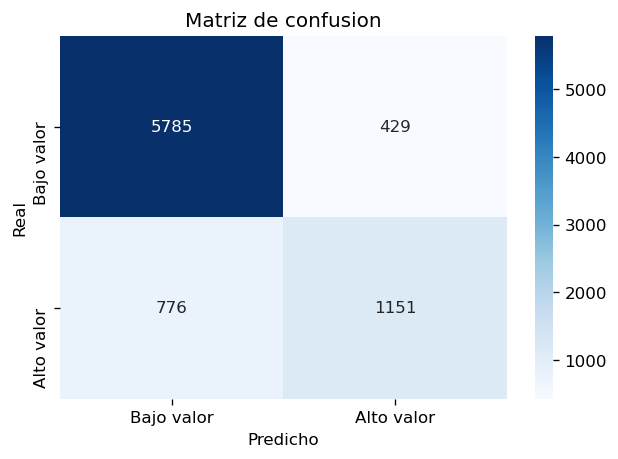

In [19]:
show_confusion_matrix(y_pred_1, y_test)

## Version 2

Agregamos ahora un encodeo a las variables numericas para que los modelos tengan en cuenta las clasificaciones que hicimos en el trabajo practico anterior

In [20]:
columns_to_sort= ["educacion", "edad", "bolsa"]
X_data_2 = encoding_sorted(X_data_1, columns_to_sort)

In [21]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_data_2.drop(columns={"tiene_alto_valor_adquisitivo"}), X_data_2["tiene_alto_valor_adquisitivo"], random_state=42)

In [31]:
regression_2 = LogisticRegression(random_state=0)
gscv_2 = GridSearchCV(regression_2, {'solver': ['newton-cg'], 'C': c,
              'penalty': ['l2']}, n_jobs = -1, scoring='roc_auc')
gs_2 = gscv_2.fit(X_train_2, y_train_2)
gs_2.best_params_

{'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}

In [33]:
regression_2 = LogisticRegression(C= 10, penalty = 'l2', solver='newton-cg',random_state=0)
regression_2.fit(X_train_2, y_train_2)
y_pred_2 = regression_2.predict(X_test_2)

In [34]:
show_metrics(regression_2, y_pred_2, y_test_2, X_test_2, "Regresion 2")

Accuracy: 0.8576341972730622
----------------------------------------------
Precision: 0.6087182148417228
----------------------------------------------
Recall: 0.7433460076045627
----------------------------------------------
F1_score: 0.6693295292439372
----------------------------------------------
AUC-ROC score para Regresion 2: 0.910


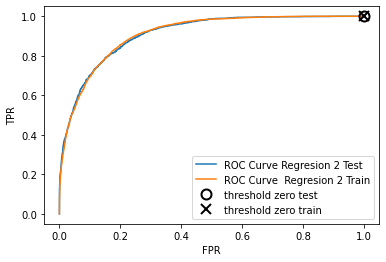

In [25]:
show_roc_curve(regression_2,"Regresion 2",X_test_2, X_train_2, y_test_2, y_train_2)

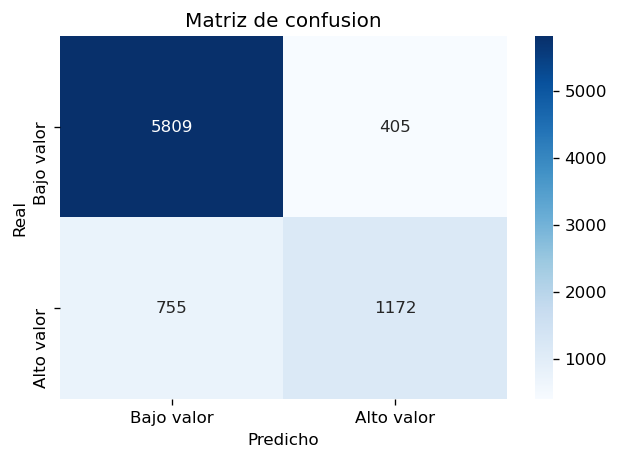

In [26]:
show_confusion_matrix(y_pred_2,y_test_2)

## Resultado

Elegimos el ultimo preprocesamiento para hacer la predicción sobre el nuevo archivo

In [27]:
columns_to_encode = ["estado_marital", "categoria_de_trabajo", "rol_familiar_registrado", "religion", "trabajo", "genero", "relacion_de_dependencia"]
X_holdout = encode_one_hot(X_holdout, columns_to_encode)
X_holdout = encoding_sorted(X_holdout, columns_to_sort)

ids = np.array(X_holdout['id'])
X_holdout.drop(columns='id', inplace=True)

In [28]:
predictions_holdout = regression_2.predict(X_holdout)

In [29]:
write_predictions(predictions_holdout,"LogisticRegression",ids)